<ipython-input-1-c32df255cc5e>:10: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  dydx = derivative(f, x, dx=1e-6)


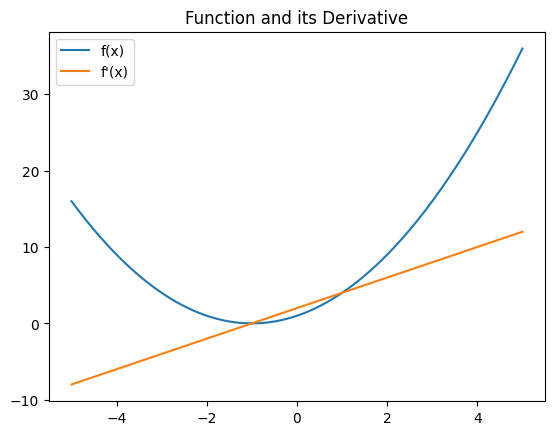

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

def f(x):
    return x**2 + 2*x + 1

x = np.linspace(-5, 5, 100)
y = f(x)
dydx = derivative(f, x, dx=1e-6)

plt.plot(x, y, label='f(x)')
plt.plot(x, dydx, label="f'(x)")
plt.legend()
plt.title('Function and its Derivative')
plt.show()

***ii.Numerical Integration***

# **b.Using PYTHON show how the following is achieved**
i.***Differentiation***

In [ ]:
import numpy as np
from scipy import integrate

def f(x):
    return x**2

a, b = 0, 1  # integration limits
result, error = integrate.quad(f, a, b)

print(f"The integral of x^2 from {a} to {b} is approximately {result:.6f}")
print(f"The estimated error is {error:.6e}")

The integral of x^2 from 0 to 1 is approximately 0.333333
The estimated error is 3.700743e-15


***iii.Curve Fitting***

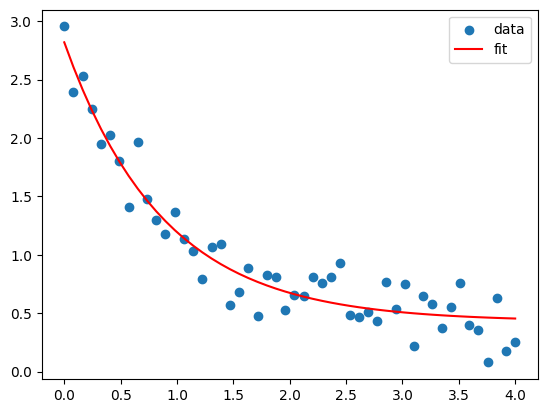

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

x = np.linspace(0, 4, 50)
y = func(x, 2.5, 1.3, 0.5) + 0.2 * np.random.normal(size=len(x))

popt, _ = curve_fit(func, x, y)

plt.scatter(x, y, label='data')
plt.plot(x, func(x, *popt), 'r-', label='fit')
plt.legend()
plt.show()

***iv.Linear Regression***

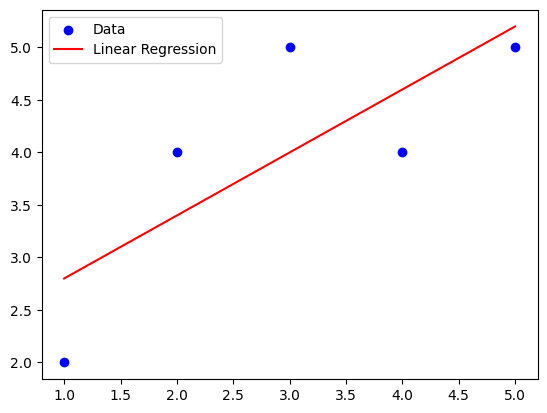

Slope: 0.60
Intercept: 2.20


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.array([1, 2, 3, 4, 5]).reshape((-1, 1))
y = np.array([2, 4, 5, 4, 5])

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)

plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, y_pred, color='red', label='Linear Regression')
plt.legend()
plt.show()

print(f"Slope: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

 ***v.Spline Interpolation***

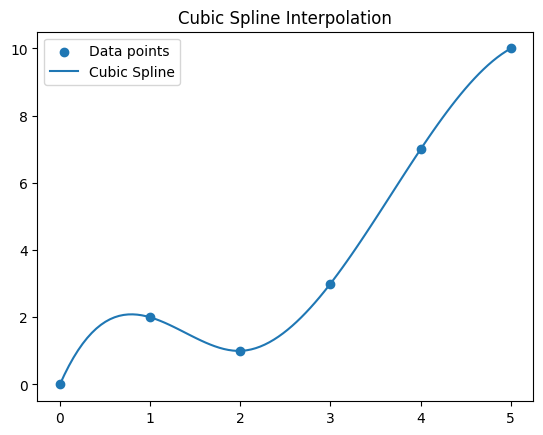

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 2, 1, 3, 7, 10])

cs = CubicSpline(x, y)
xs = np.linspace(0, 5, 100)
ys = cs(xs)

plt.scatter(x, y, label='Data points')
plt.plot(xs, ys, label='Cubic Spline')
plt.legend()
plt.title('Cubic Spline Interpolation')
plt.show()

#**c.If the laser scanner is traversing from x=2.00 to x =4.25 in a linear path, what is the value of y at x= 4.0 using the linear spline formula , show how this problem can be solved using**

At x = 4.0, y = 7.1111


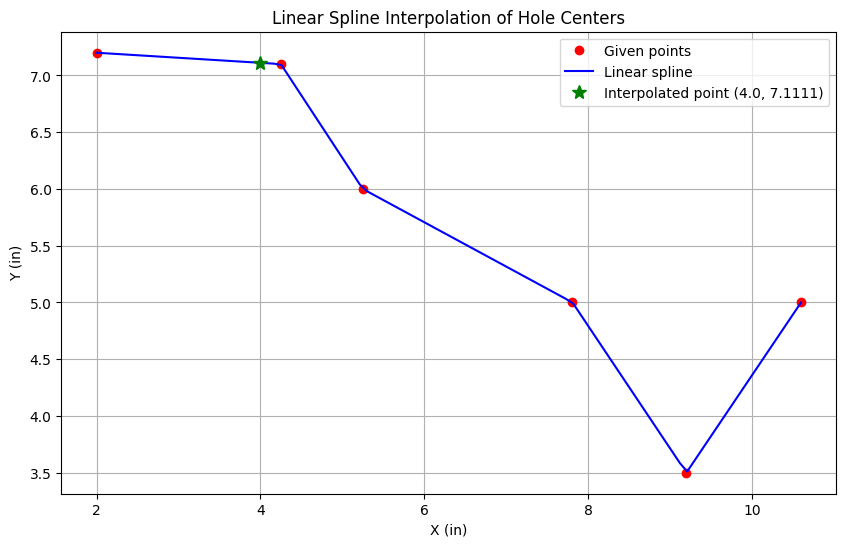

In [ ]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

# Given data
x = np.array([2.00, 4.25, 5.25, 7.81, 9.20, 10.60])
y = np.array([7.2, 7.1, 6.0, 5.0, 3.5, 5.0])

# Create a linear spline interpolation function
f = interpolate.interp1d(x, y, kind='linear')

# Calculate y at x = 4.0
x_interpolate = 4.0
y_interpolate = f(x_interpolate)

print(f"At x = {x_interpolate}, y = {y_interpolate:.4f}")

# Optional: Visualize the interpolation
x_plot = np.linspace(x.min(), x.max(), 100)
y_plot = f(x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='Given points')
plt.plot(x_plot, y_plot, 'b-', label='Linear spline')
plt.plot(x_interpolate, y_interpolate, 'g*', markersize=10, label=f'Interpolated point (4.0, {y_interpolate:.4f})')
plt.xlabel('X (in)')
plt.ylabel('Y (in)')
plt.title('Linear Spline Interpolation of Hole Centers')
plt.legend()
plt.grid(True)
plt.show()

# **e.Analyze the frequency components of a signal**

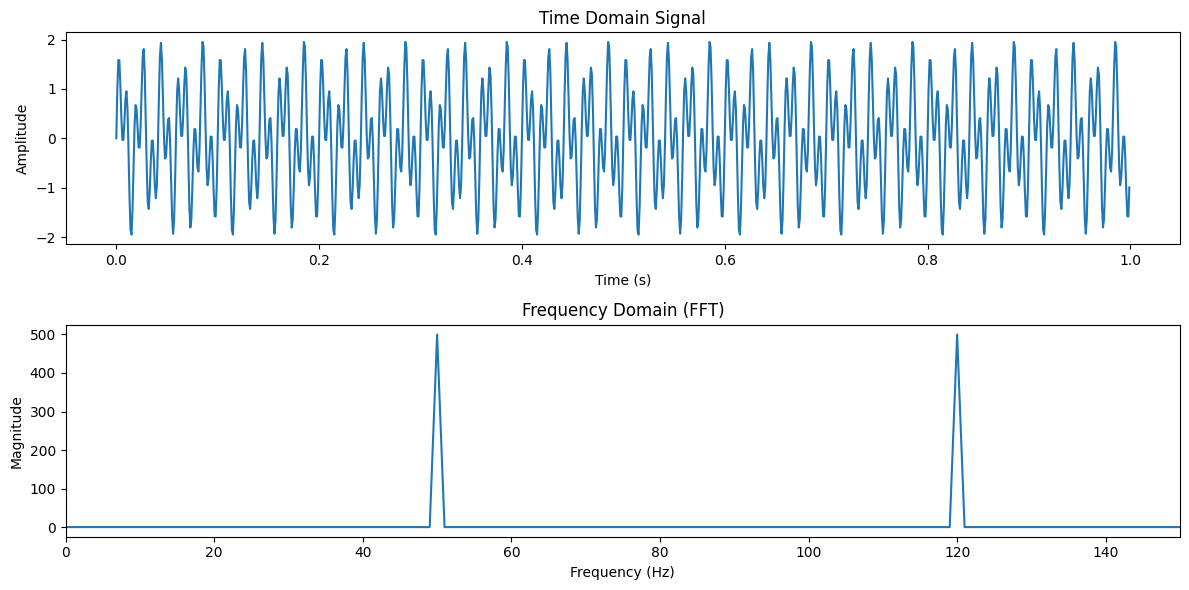

Peak frequency: 120.00 Hz
Peak frequency: 120.00 Hz


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_signal(duration=1, sample_rate=1000):
    # Time array
    t = np.linspace(0, duration, duration * sample_rate, endpoint=False)

    # Signal components
    f1, f2 = 50, 120  # Hz
    signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

    # Perform FFT
    fft_result = np.fft.fft(signal)
    frequencies = np.fft.fftfreq(len(t), 1/sample_rate)

    # Plot the results
    plt.figure(figsize=(12, 6))

    # Time domain plot
    plt.subplot(2, 1, 1)
    plt.plot(t, signal)
    plt.title('Time Domain Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # Frequency domain plot
    plt.subplot(2, 1, 2)
    plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_result)[:len(frequencies)//2])
    plt.title('Frequency Domain (FFT)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(0, 150)  # Limit x-axis to show relevant frequencies

    plt.tight_layout()
    plt.show()

    return frequencies, fft_result

# Run the analysis
freqs, fft = analyze_signal()

# Print peak frequencies
peak_indices = np.argsort(np.abs(fft))[-2:]  # Get indices of two highest peaks
for idx in peak_indices:
    print(f"Peak frequency: {abs(freqs[idx]):.2f} Hz")

# **g.Write a program to show how the trapezoidal rule of integration**

Approximate integral of x^2 from 0 to 2 using 10 trapezoids: 2.680000


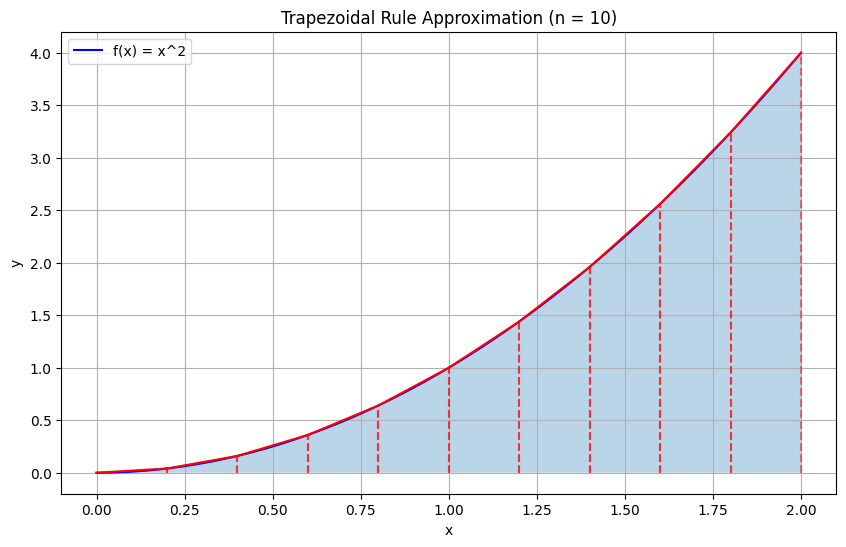

Exact integral: 2.666667
Absolute error: 0.013333


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2

def trapezoidal_rule(f, a, b, n):
    x = np.linspace(a, b, n+1)
    y = f(x)

    areas = (y[:-1] + y[1:]) * (b - a) / (2 * n)

    return np.sum(areas)

a, b = 0, 2  # integration limits
n = 10  # number of trapezoids

result = trapezoidal_rule(f, a, b, n)

print(f"Approximate integral of x^2 from {a} to {b} using {n} trapezoids: {result:.6f}")

x = np.linspace(a, b, 200)
y = f(x)

x_trapezoids = np.linspace(a, b, n+1)
y_trapezoids = f(x_trapezoids)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='f(x) = x^2')
plt.fill_between(x_trapezoids, y_trapezoids, alpha=0.3)
for i in range(n):
    plt.plot([x_trapezoids[i], x_trapezoids[i]], [0, y_trapezoids[i]], 'r--', alpha=0.5)
    plt.plot([x_trapezoids[i+1], x_trapezoids[i+1]], [0, y_trapezoids[i+1]], 'r--', alpha=0.5)
    plt.plot([x_trapezoids[i], x_trapezoids[i+1]], [y_trapezoids[i], y_trapezoids[i+1]], 'r-')

plt.title(f'Trapezoidal Rule Approximation (n = {n})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

exact_result = (b**3 - a**3) / 3
print(f"Exact integral: {exact_result:.6f}")
print(f"Absolute error: {abs(exact_result - result):.6f}")

# **i). Given a set of data points you are to perform polinomial interpolation and approximation.**

***i.Implementation : Lagrange polynomial***

In [ ]:
import numpy as np

def lagrange_interpolation(x, y):
    n = len(x)
    coeffs = np.zeros(n)

    for i in range(n):
        p = np.poly1d([1])
        for j in range(n):
            if i != j:
                p *= np.poly1d([1, -x[j]]) / (x[i] - x[j])
        coeffs += y[i] * p.coeffs

    return np.poly1d(coeffs[::-1])

# Given data points
x = [1, 2, 3, 4]
y = [1, 4, 9, 16]

lagrange_poly = lagrange_interpolation(x, y)
print("Lagrange Polynomial Coefficients:", lagrange_poly.coeffs)

Lagrange Polynomial Coefficients: [-3.55271368e-15  1.00000000e+00 -4.44089210e-16]


***ii.Implementation : Newton's divided difference method***

In [ ]:
def newton_divided_difference(x, y):
    n = len(x)
    coeffs = np.zeros(n)

    # Initialize the divided difference table
    dd = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        dd[i][0] = y[i]

    # Calculate the divided differences
    for j in range(1, n):
        for i in range(n - j):
            dd[i][j] = (dd[i+1][j-1] - dd[i][j-1]) / (x[i+j] - x[i])

    # Extract the coefficients
    for i in range(n):
        coeffs[i] = dd[0][i]

    # Convert to polynomial form
    poly = np.poly1d([1])
    result = np.poly1d([coeffs[0]])
    for i in range(1, n):
        poly *= np.poly1d([1, -x[i-1]])
        result += coeffs[i] * poly

    return result

# Using the same data points
newton_poly = newton_divided_difference(x, y)
print("Newton's Polynomial Coefficients:", newton_poly.coeffs)

Newton's Polynomial Coefficients: [1. 0. 0.]


# **j. Find the eigenvalues and eigenvectors of the given matrix**

***i.Implementation : Power iteration method***

In [ ]:
import numpy as np

def power_iteration(A, num_iterations=1000, tolerance=1e-8):
    n = A.shape[0]
    v = np.random.rand(n)
    v = v / np.linalg.norm(v)

    for _ in range(num_iterations):
        Av = A.dot(v)
        eigenvalue = v.dot(Av)
        v_new = Av / np.linalg.norm(Av)

        if np.allclose(v, v_new, rtol=tolerance):
            break

        v = v_new

    return eigenvalue, v

A = np.array([[4, 1, 1],
              [1, 3, -1],
              [1, -1, 2]])

eigenvalue, eigenvector = power_iteration(A)
print("Power Iteration Method:")
print("Dominant eigenvalue:", eigenvalue)
print("Corresponding eigenvector:", eigenvector)

Power Iteration Method:
Dominant eigenvalue: 4.675130870566642
Corresponding eigenvector: [0.88765032 0.42713233 0.17214782]


***ii.Implementation : QR Algorithm***

In [ ]:
def qr_algorithm(A, num_iterations=1000):
    n = A.shape[0]
    Q = np.eye(n)

    for _ in range(num_iterations):
        Q_k, R_k = np.linalg.qr(A)
        A = R_k.dot(Q_k)
        Q = Q.dot(Q_k)

    eigenvalues = np.diag(A)
    eigenvectors = Q

    return eigenvalues, eigenvectors

eigenvalues, eigenvectors = qr_algorithm(A)
print("\nQR Algorithm:")
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:")
print(eigenvectors)


QR Algorithm:
Eigenvalues: [4.67513087 3.53918887 0.78568026]
Eigenvectors:
[[ 0.88765034 -0.23319198 -0.39711255]
 [ 0.42713229  0.73923874  0.52065737]
 [ 0.17214786 -0.63178128  0.75578934]]


# **k.write a Python function to implement the Gradient Descent method for minimizing the given function**

In [ ]:
import numpy as np

def gradient_descent(learning_rate=0.1, max_iterations=1000, tolerance=1e-6):
    # Define the function f(x, y)
    def f(x, y):
        return x**2 + y**2 - x*y + x - y + 1

    # Define the partial derivatives
    def df_dx(x, y):
        return 2*x - y + 1

    def df_dy(x, y):
        return 2*y - x - 1

    # Initialize starting point
    x, y = 0.0, 0.0

    for i in range(max_iterations):
        # Calculate gradients
        grad_x = df_dx(x, y)
        grad_y = df_dy(x, y)

        # Update x and y
        new_x = x - learning_rate * grad_x
        new_y = y - learning_rate * grad_y

        # Check for convergence
        if abs(new_x - x) < tolerance and abs(new_y - y) < tolerance:
            break

        x, y = new_x, new_y

        if i % 100 == 0:  # Print progress every 100 iterations
            print(f"Iteration {i}: x = {x:.6f}, y = {y:.6f}, f(x,y) = {f(x, y):.6f}")

    return x, y, f(x, y)

# Run the gradient descent
min_x, min_y, min_value = gradient_descent()

print(f"\nMinimum found at:")
print(f"x = {min_x:.6f}")
print(f"y = {min_y:.6f}")
print(f"f(x,y) = {min_value:.6f}")

Iteration 0: x = -0.100000, y = 0.100000, f(x,y) = 0.830000

Minimum found at:
x = -0.333331
y = 0.333331
f(x,y) = 0.666667
